### Tensorboardに分散表現ベクトルを可視化

In [2]:
# !pip install tensorboard==1.14.0
# !pip install tensorboardX
# !pip install tb-nightly

In [3]:
# !pip install Cython

In [6]:
# from tensorboardX import SummaryWriter
import pandas as pd
import numpy as np
import torch
import japanize_matplotlib

In [7]:
# !pip install -U sentence-transformers

In [8]:
# sample

from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

#Our sentences we like to encode
# sentences = ['This framework generates embeddings for each input sentence',
#     'Sentences are passed as a list of string.',
#     'The quick brown fox jumps over the lazy dog.']

# #Sentences are encoded by calling model.encode()
# embeddings = model.encode(sentences)

# #Print the embeddings
# for sentence, embedding in zip(sentences, embeddings):
#     print("Sentence:", sentence)
#     print("Embedding:", embedding)
#     print("")

In [9]:
# writer = SummaryWriter()
# weights = embeddings

# # weights = weights[:500]
# labels = sentences

# writer.add_embedding(torch.FloatTensor(weights), metadata=labels)

In [10]:
# %load_ext tensorboard
# %tensorboard --logdir ./runs

In [11]:
#  テキストファイルの読み込み

with open("id909.txt", mode="r", encoding="utf-8") as f:  
    text = f.read().splitlines()

In [12]:
text[:5]

['Being a science and engineering woman become normal',
 'the number of women in science and engineering Increase',
 'Science and engineering women become major',
 'NPO organization be established',
 'The Society become diverse']

In [13]:
emb = model.encode(text)
print(emb[0][:10])
emb.shape

[ 0.05887948 -0.02068907  0.0659831   0.0792686   0.01846715 -0.07735819
 -0.03917976  0.01237397 -0.09701075  0.00959456]


(27, 384)

In [14]:
embedded = [[text[i], emb[i].tolist()] for i in range(len(text))]

with open('embedded.txt', 'w') as fp:
    fp.write("27 384\n")
    for item in embedded:
        fp.write("%s " %item[0])
        for lst in item[1]:
            fp.write("%s " %lst)
        fp.write("\n")
    print('Done')

Done


In [15]:
writer = SummaryWriter()
weights = emb

# weights = weights[:500]
labels = text

writer.add_embedding(torch.FloatTensor(weights), metadata=labels)

NameError: name 'SummaryWriter' is not defined

In [ ]:
%load_ext tensorboard
%tensorboard --logdir ./runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard

  %reload_ext tensorboard


In [ ]:
sent = ["Science women remain minor", "Science women become major"]
embe = model.encode(sent)

In [ ]:
writer = SummaryWriter()
weights = embe

# weights = weights[:500]
labels = sent

writer.add_embedding(torch.FloatTensor(weights), metadata=labels)

### 類似度計算

In [ ]:
sent = ["Science women are minority", "Science women are majority"]
embe = model.encode(sent)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

#類似度行列作成
cs_array = np.round(cosine_similarity(embe, embe),2)
print(cs_array)

[[1.   0.91]
 [0.91 1.  ]]


In [ ]:
#Compute embedding for both lists
embeddings1 = model.encode(sent[0], convert_to_tensor=True)
embeddings2 = model.encode(sent[1], convert_to_tensor=True)

#Compute cosine-similarities
cosine_scores = util.cos_sim(embeddings1, embeddings2)

In [ ]:
cosine_scores

tensor([[0.9121]])

In [ ]:
sign = list(np.sign(embeddings1))
sign.count(-1)

193

In [ ]:
sign1 = np.sign(embeddings1)
sign2 = np.sign(embeddings2)

cosine_scores = util.cos_sim(sign1, sign2)
cosine_scores

tensor([[0.7083]])

In [ ]:
np.sign(embeddings2)[:9]

tensor([ 1., -1.,  1.,  1.,  1., -1., -1., -1., -1.])

### 感情分析を組み合わせたい

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
print(sent[0])
print(sent[1])

sentiment_pipeline(sent)

Science women are minority
Science women are majority


[{'label': 'NEGATIVE', 'score': 0.9633888006210327},
 {'label': 'POSITIVE', 'score': 0.9798807501792908}]

In [ ]:
sentiment_pipeline("There are positive people")

[{'label': 'POSITIVE', 'score': 0.9998503923416138}]

## 性別役割分業テキスト可視化

In [16]:
op = ["I agree with the idea that 'husbands should work outside the home and wives should take care of the home'.", 
"I rather agree with the idea that 'husbands should work outside the home and wives should take care of the home'.", 
"I rather disagree with the idea that 'husbands should work outside the home and wives should take care of the home'.", 
"I disagree with the idea that 'husbands should work outside the home and wives should take care of the home'."]

In [18]:
gend = model.encode(op)

# writer = SummaryWriter()
weights = gend

# weights = weights[:500]
labels = op

# writer.add_embedding(torch.FloatTensor(weights), metadata=labels)

### 主成分分析
https://towardsdatascience.com/visualization-of-word-embedding-vectors-using-gensim-and-pca-8f592a5d3354

In [20]:
weights.shape

(4, 384)

In [21]:
vec = weights.tolist()
print(len(vec[0]), len(vec))

384 4


In [22]:
import pandas as pd

df1 = pd.DataFrame(op, columns=['sentence'])
df1

,sentence
0,I agree with the idea that 'husbands should wo...
1,I rather agree with the idea that 'husbands sh...
2,I rather disagree with the idea that 'husbands...
3,I disagree with the idea that 'husbands should...


In [23]:
df = pd.DataFrame((vec[i] for i in range(0, 4)), index=df1)
df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
"(I agree with the idea that 'husbands should work outside the home and wives should take care of the home'.,)",-0.027554,0.039380,0.027832,-0.037115,0.021701,0.017040,0.080843,-0.093988,-0.143284,-0.018548,...,0.099616,-0.065479,0.017474,-0.058809,-0.050389,0.019873,-0.000510,0.070249,0.008544,0.063030
"(I rather agree with the idea that 'husbands should work outside the home and wives should take care of the home'.,)",-0.020657,0.048408,0.019616,-0.035483,0.038134,-0.005517,0.047715,-0.083218,-0.103717,-0.012229,...,0.109128,-0.058331,-0.004003,-0.072889,-0.051409,0.026802,0.010214,0.056063,0.003143,0.057876
"(I rather disagree with the idea that 'husbands should work outside the home and wives should take care of the home'.,)",-0.008303,0.039548,0.011782,-0.029389,0.029074,-0.014805,0.034313,-0.089611,-0.101908,-0.007050,...,0.103397,-0.054568,-0.008702,-0.087694,-0.055161,0.015066,0.011247,0.060177,0.016067,0.064142
"(I disagree with the idea that 'husbands should work outside the home and wives should take care of the home'.,)",-0.008475,0.036140,0.027747,-0.022028,0.013961,-0.012958,0.069456,-0.111053,-0.135607,-0.015679,...,0.092088,-0.063725,0.004274,-0.074143,-0.055228,-0.000729,0.007074,0.067364,0.012397,0.069519


In [24]:
#Computing the correlation matrix
X_corr = df.corr()

#Computing eigen values and eigen vectors
values,vectors = np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors = vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X = np.real(np.dot(vec, new_vectors))
neww_X

array([[ 0.12740589, -0.00942899],
       [ 0.0113432 , -0.15600931],
       [-0.14667824, -0.07633905],
       [-0.08955226,  0.06625888]])

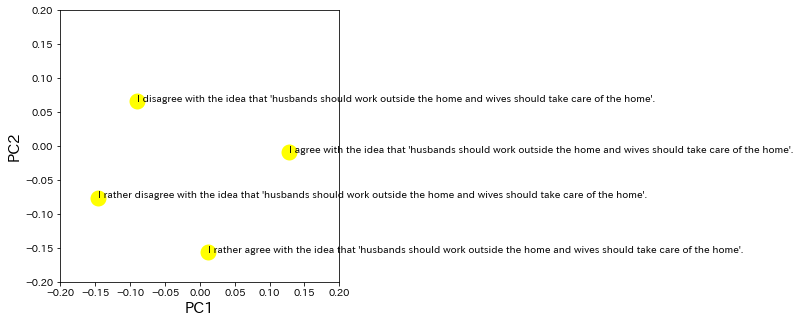

In [25]:
# np.linalg ver
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='yellow')
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
# plt.title("Word Embedding Space",size=20)
vocab=op
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))

plt.savefig('pca0.png')

In [26]:
neww_X

array([[ 0.12740589, -0.00942899],
       [ 0.0113432 , -0.15600931],
       [-0.14667824, -0.07633905],
       [-0.08955226,  0.06625888]])

In [27]:
h = neww_X
h_0 = np.append(h, [0,0])
print(h.shape)
print(h_0.shape)
h_1 = h_0.reshape(5,2)
h_1

(4, 2)
(10,)


array([[ 0.12740589, -0.00942899],
       [ 0.0113432 , -0.15600931],
       [-0.14667824, -0.07633905],
       [-0.08955226,  0.06625888],
       [ 0.        ,  0.        ]])

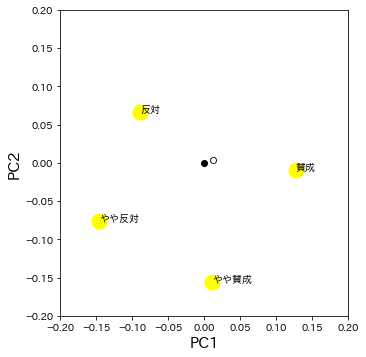

In [28]:
# np.linalg ver
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(neww_X[:,0],neww_X[:,1], linewidths=10, color='yellow')
plt.scatter(0, 0, linewidths=1, color='black')
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
# plt.title("Word Embedding Space",size=20)
jp = ['賛成', 'やや賛成', 'やや反対', '反対', '  O']
for i, word in enumerate(jp):
  plt.annotate(word,xy=(h_1[i,0],h_1[i,1]))

plt.subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.95)
plt.savefig('pca_jp_withO.png')

#### 寄与率計算
https://qiita.com/nmmg0031785/items/0ab3f8cdf22f5f0ea273

In [29]:
# 共分散行列(covariance matrix)
covmatrix = np.cov(weights.T)

# 固有値, 固有ベクトルを求める
eig = np.linalg.eig(covmatrix)[0]
eigvec = np.linalg.eig(covmatrix)[1]

# 昇順に並べ替え
idx = np.argsort(eig)[::-1]
eig = eig[idx]
eigvec = eigvec[idx]

# 主成分得点
pcacor = np.dot(weights, eigvec)

# 寄与率
cr = eig/sum(eig)

c:\Users\Sophia\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


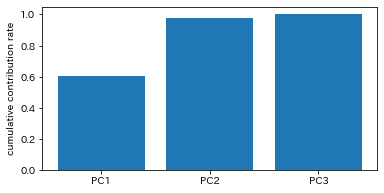

In [30]:
import matplotlib.pyplot as plt

## 累積寄与率をプロット
ccr = np.cumsum(cr)[:3]
lb = ["PC{}".format(i+1) for i in range(3)]

fig = plt.figure(figsize=(6,3)) #,dpi=320)
ax = fig.add_subplot(111)
ax.bar(lb, ccr, label="累積寄与率")
plt.ylabel("cumulative contribution rate")
plt.savefig('contri_rate.png')

c:\Users\Sophia\anaconda3\lib\site-packages\matplotlib\text.py:824: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(self._x))
c:\Users\Sophia\anaconda3\lib\site-packages\matplotlib\text.py:825: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
c:\Users\Sophia\anaconda3\lib\site-packages\matplotlib\text.py:684: ComplexWarning: Casting complex values to real discards the imaginary part
  posx = float(textobj.convert_xunits(textobj._x))
c:\Users\Sophia\anaconda3\lib\site-packages\matplotlib\text.py:685: ComplexWarning: Casting complex values to real discards the imaginary part
  posy = float(textobj.convert_yunits(textobj._y))


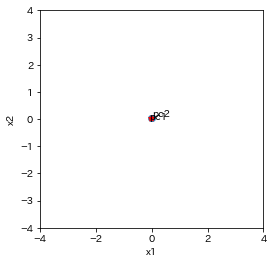

In [31]:
# データ中心と主成分軸を計算
ave = np.mean(weights, axis=0)
dpt = ave + eigvec

# プロット
fig = plt.figure(figsize=(4,4)) #,dpi=320)
ax = fig.add_subplot(111)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.xlabel("x1")
plt.ylabel("x2")

ax.scatter(weights[:,0], weights[:,1], alpha=0.4)
ax.scatter(ave[0], ave[1], marker="*", color="red")
for i in range(2):
    ax.plot([ave[0], dpt[0,i]], [ave[1], dpt[1,i]],
            color="red", linewidth=1)
    ax.text(dpt[0,i], dpt[1,i], "pc{}".format(i+1))

#### sklearnによる確かめ
https://chokkan.github.io/mlnote/unsupervised/03pca.html#id7

##### 転置しているバージョン

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = weights.T
pca.fit(X)

PCA(n_components=2)

In [33]:
new_X = pca.components_.T
new_X

array([[-0.49781963, -0.71837264],
       [-0.5012748 , -0.19533806],
       [-0.5003439 ,  0.5805567 ],
       [-0.50055456,  0.32975423]], dtype=float32)

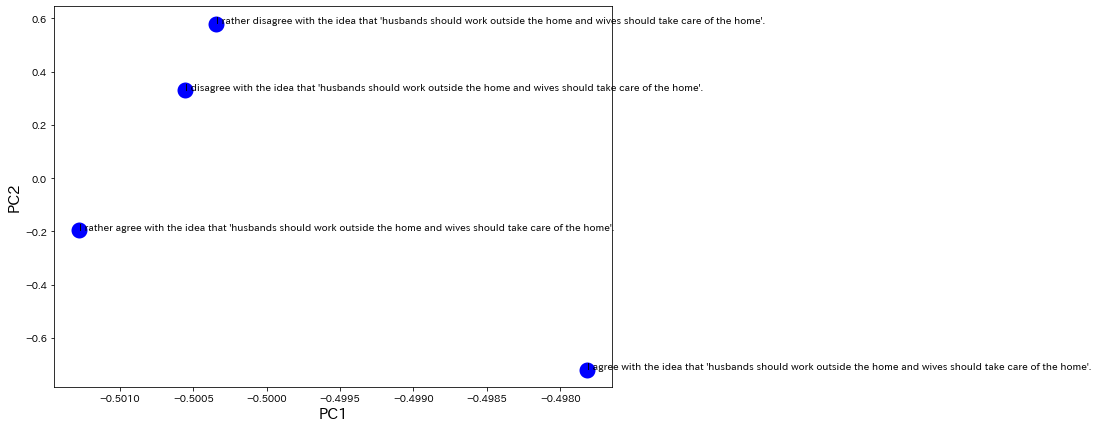

In [34]:
# sklearn ver
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(new_X[:,0],new_X[:,1], linewidths=10, color='blue')
# plt.xlim(-0.25, 0.25)
# plt.ylim(-0.25, 0.25)
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
# plt.title("Word Embedding Space",size=20)
vocab=op
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(new_X[i,0],new_X[i,1]))

##### 再現バージョン

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = weights
pca.fit(X)

PCA(n_components=2)

In [36]:
pca.components_

array([[-6.88455477e-02,  1.16149280e-02,  3.30797471e-02,
        -3.90315279e-02,  6.23076130e-03,  1.02463409e-01,
         1.03883930e-01,  2.20990181e-02, -8.05691630e-02,
        -2.72939038e-02,  2.18337979e-02, -1.07676703e-02,
        -5.75617068e-02, -4.67869453e-02,  2.85099782e-02,
         9.06629115e-03, -9.02442634e-02, -7.62199285e-04,
        -7.64199197e-02,  3.84707302e-02,  2.53939964e-02,
        -7.26697687e-03,  7.36592636e-02, -3.13840024e-02,
        -3.32181156e-02,  7.28521347e-02,  4.60239761e-02,
        -6.55778125e-02,  3.05238031e-02,  2.81820018e-02,
         3.52871716e-02, -6.99223056e-02,  8.00181180e-02,
        -2.10800879e-02, -6.63194433e-02,  1.87408943e-02,
        -2.04114150e-02, -1.49531901e-04, -7.83464499e-03,
        -1.16957948e-02, -4.36272584e-02,  1.56108327e-02,
         5.98321371e-02,  9.47343260e-02,  1.59379235e-03,
        -3.03709134e-02, -3.30431270e-03,  2.02333648e-02,
         1.04138859e-01, -6.00271560e-02,  8.49561486e-0

In [37]:
pca.singular_values_ ** 2

array([0.05508606, 0.03400173], dtype=float32)

In [38]:
new = pca.transform(X)
new

array([[ 0.1684499 , -0.05059791],
       [ 0.04556515,  0.12320378],
       [-0.13644671,  0.04623974],
       [-0.07756833, -0.11884569]], dtype=float32)

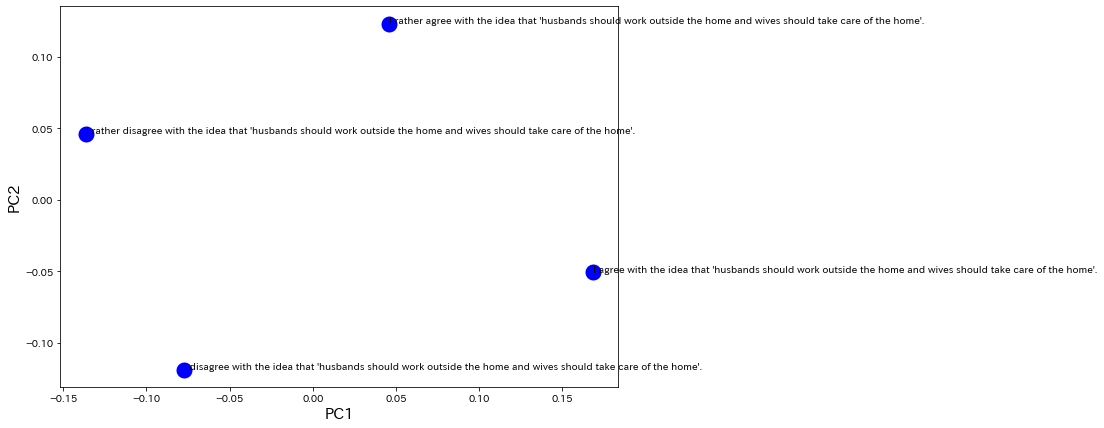

In [39]:
# sklearn ver
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(new[:,0],new[:,1], linewidths=10, color='blue')
# plt.xlim(-0.25, 0.25)
# plt.ylim(-0.25, 0.25)
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
# plt.title("Word Embedding Space",size=20)
vocab=op
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(new[i,0],new[i,1]))

### データの読み込み

In [40]:
data = pd.read_excel("domestic.xlsx")
data

,調査,賛成,どちらかといえば賛成,どちらかといえば反対,反対,わからない
0,1979年5月調査,29.1,41.0,18.3,4.5,7.1
1,1992年11月調査,19.8,35.8,26.4,11.9,6.1
2,1997年9月調査,17.9,34.0,26.9,16.7,4.6
3,2002年7月調査,12.8,30.5,29.4,21.7,5.6
4,2004年11月調査,11.0,30.2,29.5,24.2,5.0
5,2007年8月調査,12.0,27.8,30.7,26.2,3.2
6,2009年10月調査,9.5,27.8,32.0,26.6,4.0
7,2012年10月調査,12.4,36.0,30.4,18.4,2.8
8,2014年8月調査,11.2,32.0,34.2,17.4,5.1
9,2016年9月調査,8.3,28.7,37.0,21.5,4.5


In [41]:
# data = pd.read_excel("domestic_.xlsx")
# data

In [42]:
data.iloc[0, 1:]

賛成            29.1
どちらかといえば賛成    41.0
どちらかといえば反対    18.3
反対             4.5
わからない          7.1
Name: 0, dtype: object

In [43]:
year1979 = pd.DataFrame({data.iloc[0, 0] : data.iloc[0, 1:]})
year1979['pot'] = -np.log(year1979['1979年5月調査'].astype(np.float64)/100)
# type(np.log(year1979.iloc[0,0]/100))
year1979

,1979年5月調査,pot
賛成,29.1,1.234432
どちらかといえば賛成,41.0,0.891598
どちらかといえば反対,18.3,1.698269
反対,4.5,3.101093
わからない,7.1,2.645075


##### 境界線なし

C:\Users\Sophia\AppData\Local\Temp/ipykernel_22108/344222637.py:41: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax2.plot_surface(X_grid, Y_grid, Z_grid, cmap=cm.coolwarm,


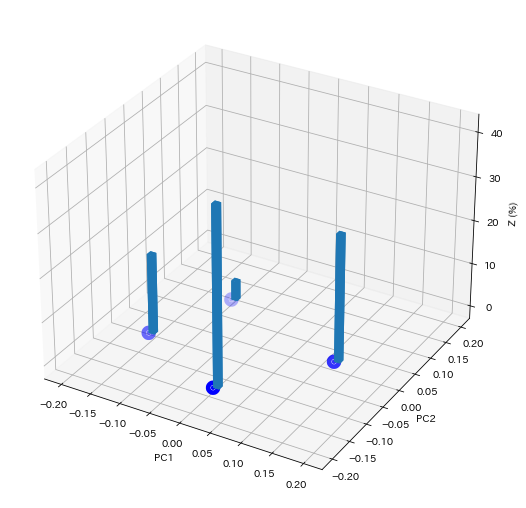

In [44]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.cm as cm

# set up the figure and axes
fig = plt.figure(figsize=(10, 20))
ax2 = fig.add_subplot(211, projection='3d')

ax2.scatter(neww_X[:,0],neww_X[:,1], [0,0,0,0], linewidths=10,color='blue')
# ax2.xlim(-0.25, 0.25)
# ax2.ylim(-0.25, 0.25)
# ax2.xlabel("PC1",size=15)
# ax2.ylabel("PC2",size=15)
# ax2.title("1979年5月調査",size=20)
# vocab=op
# for i, word in enumerate(vocab):
#   ax2.annotate(word,xy=(neww_X[i,0], neww_X[i,1]))

# bar graph code
x, y, z = neww_X[:,0], neww_X[:,1], year1979.iloc[:-1, 0].astype(np.float64).tolist()
# print(x, y, z)
top = z
bottom = np.zeros_like(top)
width = 0.01
depth = 0.01
ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
# ax2.set_title('支持者数')

# # surface plot code
X, Y, Z = neww_X[:,0], neww_X[:,1], 10*year1979.iloc[:-1, 1]

points = np.array([X, Y]).T

# # create a grid of coordinates between the minimum and
# # maximum of your X and Y. 50j indicates 50 discretization
# # points between the minimum and maximum.
X_grid, Y_grid = np.mgrid[-0.2:0.2:50j, -0.2:0.2:50j]
# # interpolate your values on the grid defined above
Z_grid = griddata(points, Z, (X_grid, Y_grid), method='cubic')

ax2.plot_surface(X_grid, Y_grid, Z_grid, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=True)

# ax2.view_init(elev= 25, azim=15, roll=0)

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('Z (%)')

plt.savefig('domestic_pot_none.png')
plt.show()

##### 境界線あり

In [45]:
dum = [-0.2, -0.1, 0, 0.1, 0.2, -0.2, -0.1, 0, 0.1, 0.2]
dumy = [0.2, 0.2, 0.2, 0.2, 0.2, -0.2, -0.2, -0.2, -0.2, -0.2]

xx = neww_X[:,0].tolist()
yy = neww_X[:,1].tolist()

for i in range(len(dum)):
    xx.append(dum[i]) 
    yy.append(dumy[i])

print(xx, len(xx))
print(yy, len(yy))

[0.12740588551151, 0.011343204128323448, -0.14667823526319596, -0.08955226114110458, -0.2, -0.1, 0, 0.1, 0.2, -0.2, -0.1, 0, 0.1, 0.2] 14
[-0.009428992475177951, -0.15600931175310268, -0.07633904714433837, 0.06625887688867076, 0.2, 0.2, 0.2, 0.2, 0.2, -0.2, -0.2, -0.2, -0.2, -0.2] 14


In [46]:
zz = 10*year1979.iloc[:-1, 1]
zz = zz.to_list()
for i in range(len(dum)):
    zz.append(-np.log(1/100))
# zz

##### 1979年のみ

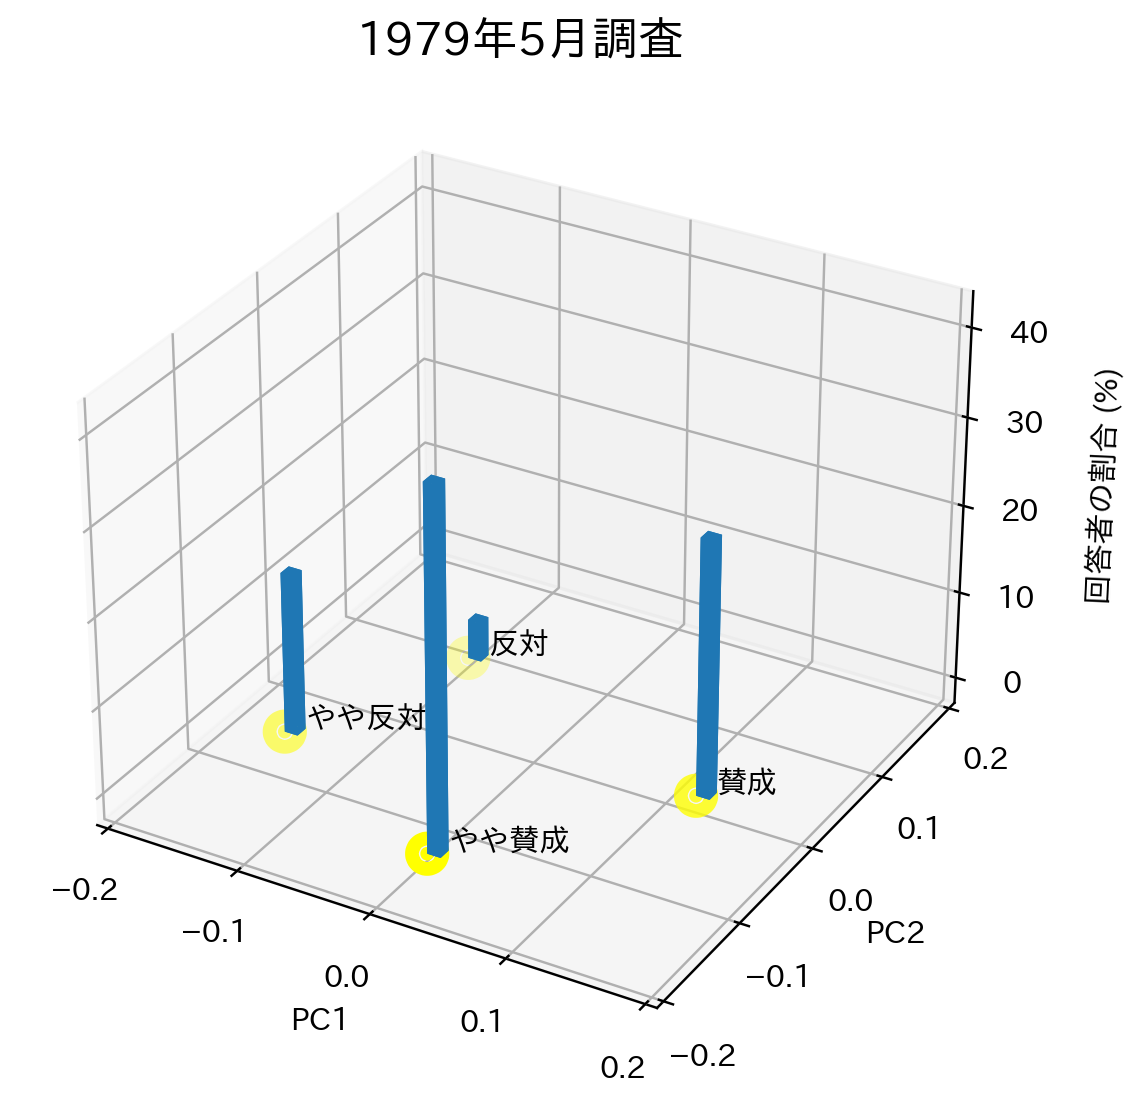

In [47]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.cm as cm

# set up the figure and axes
fig = plt.figure(figsize=(6, 6), dpi=220)
ax2 = fig.add_subplot(111, projection='3d')

ax2.scatter(neww_X[:,0],neww_X[:,1], [0,0,0,0], linewidths=10,color='yellow')
# ax2.xlim(-0.25, 0.25)
# ax2.ylim(-0.25, 0.25)
# ax2.xlabel("PC1",size=15)
# ax2.ylabel("PC2",size=15)

jp = ['賛成', 'やや賛成', 'やや反対', '反対']
for i, word in enumerate(jp):
  ax2.text(neww_X[i,0]+0.01, neww_X[i,1]+0.01, 0, word, zdir=None)

# bar graph code
x, y, z = neww_X[:,0], neww_X[:,1], year1979.iloc[:-1, 0].astype(np.float64).tolist()
# print(x, y, z)
top = z
bottom = np.zeros_like(top)
width = 0.01
depth = 0.01
ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
# ax2.set_title('支持者数')

plt.xticks([-0.2, -0.1, 0, 0.1, 0.2])
plt.yticks([-0.2, -0.1, 0, 0.1, 0.2])

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel("\n回答者の割合 (%)")
ax2.set_title("1979年5月調査",size=15)

plt.savefig("domestic_1979.png")
plt.show()

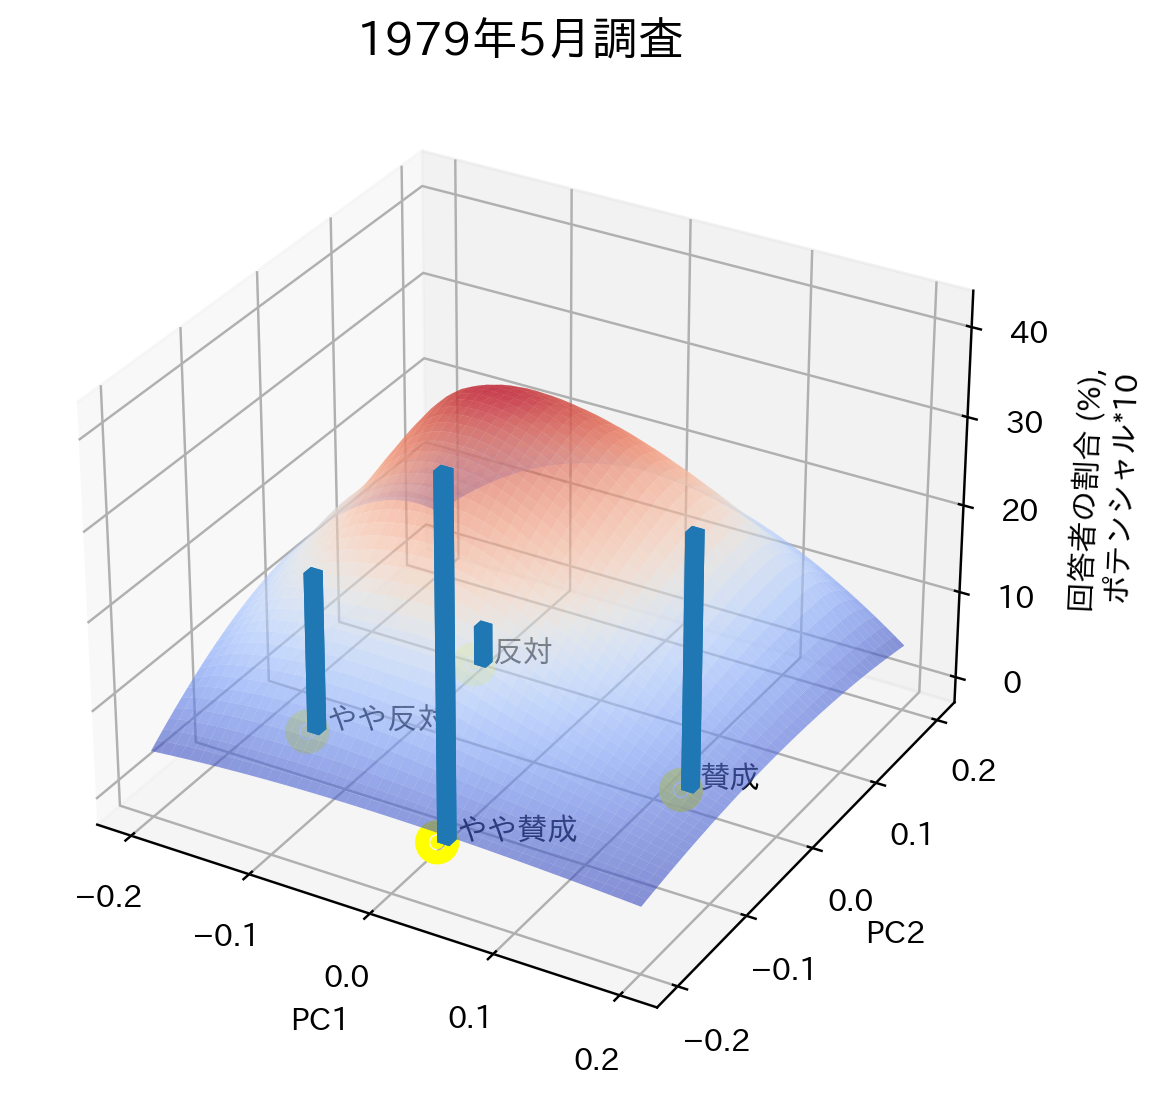

In [48]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.cm as cm

# set up the figure and axes
fig = plt.figure(figsize=(6, 6), dpi=220)
ax2 = fig.add_subplot(111, projection='3d')

ax2.scatter(neww_X[:,0],neww_X[:,1], [0,0,0,0], linewidths=10,color='yellow')
# ax2.xlim(-0.25, 0.25)
# ax2.ylim(-0.25, 0.25)
# ax2.xlabel("PC1",size=15)
# ax2.ylabel("PC2",size=15)

jp = ['賛成', 'やや賛成', 'やや反対', '反対']
for i, word in enumerate(jp):
  ax2.text(neww_X[i,0]+0.01, neww_X[i,1]+0.01, 0, word, zdir=None)

# bar graph code
x, y, z = neww_X[:,0], neww_X[:,1], year1979.iloc[:-1, 0].astype(np.float64).tolist()
# print(x, y, z)
top = z
bottom = np.zeros_like(top)
width = 0.01
depth = 0.01
ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
# ax2.set_title('支持者数')

## surface plot code
# border condition
dum = [-0.2, 0.2, -0.2, 0.2]
dumy = [-0.2, 0.2, 0.2, -0.2]

xx = neww_X[:,0].tolist()
yy = neww_X[:,1].tolist()

for l in range(len(dum)):
    xx.append(dum[l]) 
    yy.append(dumy[l])

zz = 10*year1979.iloc[:-1, 1]
zz = zz.to_list()
for m in range(len(dum)):
    zz.append(-np.log(1/100))
    
X, Y, Z = xx, yy, zz

points = np.array([X, Y]).T

# # create a grid of coordinates between the minimum and
# # maximum of your X and Y. 50j indicates 50 discretization
# # points between the minimum and maximum.
X_grid, Y_grid = np.mgrid[-0.2:0.2:50j, -0.2:0.2:50j]
# # interpolate your values on the grid defined above
Z_grid = griddata(points, Z, (X_grid, Y_grid), method='cubic')

ax2.plot_surface(X_grid, Y_grid, Z_grid, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=True, alpha=.6)

# ax2.view_init(elev= 25, azim=15, roll=0)

plt.xticks([-0.2, -0.1, 0, 0.1, 0.2])
plt.yticks([-0.2, -0.1, 0, 0.1, 0.2])

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel("\n回答者の割合 (%), \nポテンシャル*10")
ax2.set_title("1979年5月調査",size=15)

plt.savefig("domestic_pot_1979.png")
plt.show()

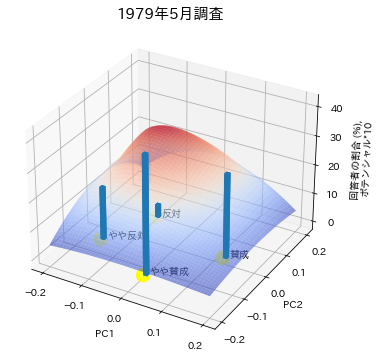

In [49]:
# griddata調べ

from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.cm as cm

# set up the figure and axes
fig = plt.figure(figsize=(6, 6)) #, dpi=220)
ax2 = fig.add_subplot(111, projection='3d')

ax2.scatter(neww_X[:,0],neww_X[:,1], [0,0,0,0], linewidths=10,color='yellow')
# ax2.xlim(-0.25, 0.25)
# ax2.ylim(-0.25, 0.25)
# ax2.xlabel("PC1",size=15)
# ax2.ylabel("PC2",size=15)

jp = ['賛成', 'やや賛成', 'やや反対', '反対']
for i, word in enumerate(jp):
  ax2.text(neww_X[i,0]+0.01, neww_X[i,1]+0.01, 0, word, zdir=None)

# bar graph code
x, y, z = neww_X[:,0], neww_X[:,1], year1979.iloc[:-1, 0].astype(np.float64).tolist()
# print(x, y, z)
top = z
bottom = np.zeros_like(top)
width = 0.01
depth = 0.01
ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
# ax2.set_title('支持者数')

## surface plot code
# border condition
dum = [-0.2, 0.2, -0.2, 0.2]
dumy = [-0.2, 0.2, 0.2, -0.2]

xx = neww_X[:,0].tolist()
yy = neww_X[:,1].tolist()

for l in range(len(dum)):
    xx.append(dum[l]) 
    yy.append(dumy[l])

zz = 10*year1979.iloc[:-1, 1]
zz = zz.to_list()
for m in range(len(dum)):
    zz.append(-np.log(1/100))
    
X, Y, Z = xx, yy, zz

points = np.array([X, Y]).T

# # create a grid of coordinates between the minimum and
# # maximum of your X and Y. 50j indicates 50 discretization
# # points between the minimum and maximum.
X_grid, Y_grid = np.mgrid[-0.2:0.2:50j, -0.2:0.2:50j]
# # interpolate your values on the grid defined above
Z_grid = griddata(points, Z, (X_grid, Y_grid), method='cubic')

ax2.plot_surface(X_grid, Y_grid, Z_grid, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=True, alpha=.6)

# ax2.view_init(elev= 25, azim=15, roll=0)

plt.xticks([-0.2, -0.1, 0, 0.1, 0.2])
plt.yticks([-0.2, -0.1, 0, 0.1, 0.2])

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel("\n回答者の割合 (%), \nポテンシャル*10")
ax2.set_title("1979年5月調査",size=15)

plt.savefig("domestic_pot_1979.png")
plt.show()

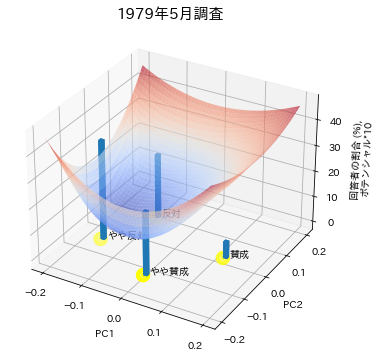

In [63]:
# corrected

from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.cm as cm

# set up the figure and axes
fig = plt.figure(figsize=(6, 6)) #, dpi=220)
ax2 = fig.add_subplot(111, projection='3d')

ax2.scatter(neww_X[:,0],neww_X[:,1], [0,0,0,0], linewidths=10,color='yellow')
# ax2.xlim(-0.25, 0.25)
# ax2.ylim(-0.25, 0.25)
# ax2.xlabel("PC1",size=15)
# ax2.ylabel("PC2",size=15)

jp = ['賛成', 'やや賛成', 'やや反対', '反対']
for i, word in enumerate(jp):
  ax2.text(neww_X[i,0]+0.01, neww_X[i,1]+0.01, 0, word, zdir=None)

# bar graph code
x, y, z = neww_X[:,0], neww_X[:,1], year1979.iloc[:-1, 0].astype(np.float64).tolist()
# print(x, y, z)
top = z
bottom = np.zeros_like(top)
width = 0.01
depth = 0.01
ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
# ax2.set_title('支持者数')

## surface plot code
# border condition
dum = [-0.2, 0.2, -0.2, 0.2]
dumy = [-0.2, 0.2, 0.2, -0.2]

xx = neww_X[:,0].tolist()
yy = neww_X[:,1].tolist()

for l in range(len(dum)):
    xx.append(dum[l]) 
    yy.append(dumy[l])

zz = 10*year1979.iloc[:-1, 1]
zz = zz.to_list()
for m in range(len(dum)):
    zz.append(-10*np.log(1/100))
    
X, Y, Z = xx, yy, zz

points = np.array([X, Y]).T

# # create a grid of coordinates between the minimum and
# # maximum of your X and Y. 50j indicates 50 discretization
# # points between the minimum and maximum.
X_grid, Y_grid = np.mgrid[-0.2:0.2:50j, -0.2:0.2:50j]
# # interpolate your values on the grid defined above
Z_grid = griddata(points, Z, (X_grid, Y_grid), method='cubic')

ax2.plot_surface(X_grid, Y_grid, Z_grid, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=True, alpha=.6)

# ax2.view_init(elev= 25, azim=15, roll=0)

plt.xticks([-0.2, -0.1, 0, 0.1, 0.2])
plt.yticks([-0.2, -0.1, 0, 0.1, 0.2])

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel("\n回答者の割合 (%), \nポテンシャル*10")
ax2.set_title("1979年5月調査",size=15)

plt.savefig("domestic_pot_1979_corrected.png")
plt.show()

### まとめて可視化

In [50]:
data

,調査,賛成,どちらかといえば賛成,どちらかといえば反対,反対,わからない
0,1979年5月調査,29.1,41.0,18.3,4.5,7.1
1,1992年11月調査,19.8,35.8,26.4,11.9,6.1
2,1997年9月調査,17.9,34.0,26.9,16.7,4.6
3,2002年7月調査,12.8,30.5,29.4,21.7,5.6
4,2004年11月調査,11.0,30.2,29.5,24.2,5.0
5,2007年8月調査,12.0,27.8,30.7,26.2,3.2
6,2009年10月調査,9.5,27.8,32.0,26.6,4.0
7,2012年10月調査,12.4,36.0,30.4,18.4,2.8
8,2014年8月調査,11.2,32.0,34.2,17.4,5.1
9,2016年9月調査,8.3,28.7,37.0,21.5,4.5


In [51]:
year1979 = pd.DataFrame({data.iloc[1, 0] : data.iloc[1, 1:]})
year1979['pot'] = -np.log(year1979.iloc[:, 0].astype(np.float64)/100)
# type(np.log(year1979.iloc[0,0]/100))
year1979

,1992年11月調査,pot
賛成,19.8,1.619488
どちらかといえば賛成,35.8,1.027222
どちらかといえば反対,26.4,1.331806
反対,11.9,2.128632
わからない,6.1,2.796881


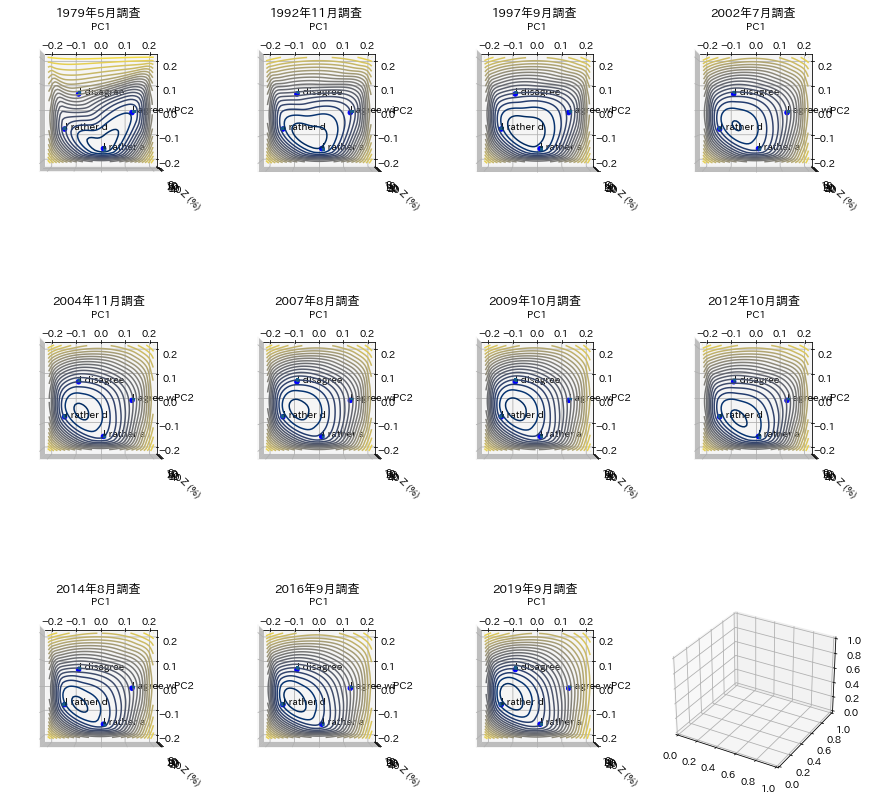

In [61]:
fig, axes = plt.subplots(3, 4, figsize=(15,15), subplot_kw={'projection': '3d'})

h = 0

for i in range(3):
    for j in range(4):

        axes[i][j].scatter(neww_X[:,0], neww_X[:,1], [0,0,0,0], linewidths=1,color='blue')
        vocab=op
        for k, word in enumerate(vocab):
            axes[i][j].text(neww_X[k,0], neww_X[k,1], 0, word[:10], zdir=None)

        # calculate potential
        year1979 = pd.DataFrame({data.iloc[h, 0] : data.iloc[h, 1:]})
        year1979['pot'] = -np.log(year1979.iloc[:, 0].astype(np.float64)/100)

        # bar graph code
        x, y, z = neww_X[:,0], neww_X[:,1], year1979.iloc[:-1, 0].astype(np.float64).tolist()
        
        top = z
        bottom = np.zeros_like(top)
        width = 0.01
        depth = 0.01
        axes[i][j].bar3d(x, y, bottom, width, depth, top, shade=True)
        axes[i][j].set_title(data.iloc[h, 0])
        h += 1

        # # surface plot code

        dum = [-0.2, 0.2, -0.2, 0.2]
        dumy = [-0.2, 0.2, 0.2, -0.2]

        xx = neww_X[:,0].tolist()
        yy = neww_X[:,1].tolist()

        for l in range(len(dum)):
            xx.append(dum[l]) 
            yy.append(dumy[l])

        zz = 10*year1979.iloc[:-1, 1]
        zz = zz.to_list()
        for m in range(len(dum)):
            zz.append(-10*np.log(1/100))
        
        X, Y, Z = xx, yy, zz

        points = np.array([X, Y]).T

        # # create a grid of coordinates between the minimum and
        # # maximum of your X and Y. 50j indicates 50 discretization
        # # points between the minimum and maximum.
        X_grid, Y_grid = np.mgrid[-0.2:0.2:50j, -0.2:0.2:50j]
        # # interpolate your values on the grid defined above
        Z_grid = griddata(points, Z, (X_grid, Y_grid), method='cubic')

        # axes[i][j].plot_surface(X_grid, Y_grid, Z_grid, cmap=cm.coolwarm, 
        #                     linewidth=0, antialiased=True, alpha=.7)
        axes[i][j].contour3D(X_grid, Y_grid, Z_grid, levels=20, cmap=cm.cividis)

        # axes[i][j].set_ylim(-0.5, 0.5)

        axes[i][j].view_init(elev=90, azim=270) #, roll=0)

        axes[i][j].set_xlabel("PC1")
        axes[i][j].set_ylabel("PC2")
        axes[i][j].set_zlabel("Z (%)")

        if h == 11:
            break

# plt.savefig("domestic_pot_all.png")